# MNIST - Categorical Classification
> Overfitting Issue

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import tensorflow as tf
tf.__version__

'2.5.0'

In [ ]:
# GPU 설정 확인

tf.test.gpu_device_name()

'/device:GPU:0'

**l.MNIST Data Load**


In [ ]:
# Load MNIST Data_Set

from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
# Train_Data Information

print(len(X_train))
print(X_train.shape)

print(len(y_train))
print(y_train[0:5])

60000
(60000, 28, 28)
60000
[5 0 4 1 9]


In [ ]:
# Test_Data Information

print(len(X_test))
print(X_test.shape)

print(len(y_test))
print(y_test[0:5])

10000
(10000, 28, 28)
10000
[7 2 1 0 4]


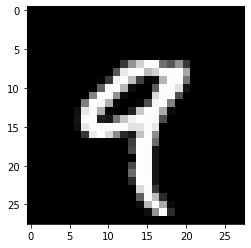

In [ ]:
# Visualization

import matplotlib.pyplot as plt

digit = X_train[4]
plt.imshow(digit, cmap = 'gray')
plt.show()

In [ ]:
import numpy as np
np.set_printoptions(linewidth = 150)

print(X_train[4])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  55 148 210 253 253 113  87 148  55   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  87 232 252 253 189 210 252 252 25

**ll.Data Preprocessing**

In [ ]:
# Reshape 
# Reshape (60000, 28, 28) to (60000, 28 * 28)

X_train = X_train.reshape((60000, 28 * 28))
X_test = X_test.reshape((10000, 28 * 28))

X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [ ]:
# Normalization

X_train = X_train.astype(float) / 255
X_test = X_test.astype(float) / 255

print(X_train[4])

[0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0. 

In [ ]:
# One Hot Encoding

from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(y_train[:5])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


**lll.MNIST Keras Modeling**

In [ ]:
# 모델 신경망 구조 정의 (Model Define)
# 2개의 Hidden Layers & 768개의 Nodes
# 복잡한 Model Capacity로 인한 Overfitting

from tensorflow.keras import models 
from tensorflow.keras import layers

mnist = models.Sequential()
mnist.add(layers.Dense(512, activation = 'relu', input_shape = (28 * 28,)))
mnist.add(layers.Dense(256, activation = 'relu'))
mnist.add(layers.Dense(10, activation = 'softmax'))

In [ ]:
# 모델 구조 확인

mnist.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Model Compile
# 모델 학습 방법 설정

mnist.compile(loss = 'categorical_crossentropy',
              optimizer = 'rmsprop', 
              metrics = ['accuracy'])

In [ ]:
%%time

Hist_mnist = mnist.fit(X_train, y_train, epochs = 100, 
                     batch_size = 128, validation_split = 0.2)

Epoch 1/100
375/375 [==============================] - 5s 4ms/step - loss: 0.2544 - accuracy: 0.9236 - val_loss: 0.1290 - val_accuracy: 0.9603
Epoch 2/100
375/375 [==============================] - 1s 3ms/step - loss: 0.0933 - accuracy: 0.9703 - val_loss: 0.0934 - val_accuracy: 0.9709
Epoch 3/100
375/375 [==============================] - 1s 4ms/step - loss: 0.0589 - accuracy: 0.9818 - val_loss: 0.0817 - val_accuracy: 0.9768
Epoch 4/100
375/375 [==============================] - 1s 3ms/step - loss: 0.0403 - accuracy: 0.9876 - val_loss: 0.0920 - val_accuracy: 0.9782
Epoch 5/100
375/375 [==============================] - 1s 3ms/step - loss: 0.0292 - accuracy: 0.9905 - val_loss: 0.0960 - val_accuracy: 0.9780
Epoch 6/100
375/375 [==============================] - 1s 3ms/step - loss: 0.0216 - accuracy: 0.9936 - val_loss: 0.1089 - val_accuracy: 0.9781
Epoch 7/100
375/375 [==============================] - 1s 3ms/step - loss: 0.0190 - accuracy: 0.9940 - val_loss: 0.1016 - val_accuracy: 0.9786

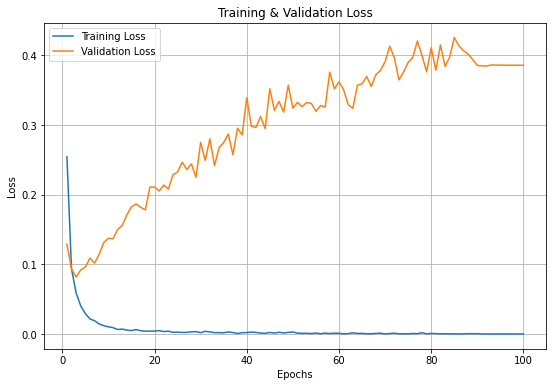

In [ ]:
# 학습 결과 시각화 - Overfitting
# Loss Visualization

import matplotlib.pyplot as plt

epochs = range(1, len(Hist_mnist.history['loss']) + 1)

plt.figure(figsize = (9, 6))
plt.plot(epochs, Hist_mnist.history['loss'])
plt.plot(epochs, Hist_mnist.history['val_loss'])
# plt.ylim(0, 0.25)
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

In [ ]:
# Model Evaluate
# Loss & Accuracy

loss, accuracy = mnist.evaluate(X_test, y_test)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

313/313 [==============================] - 1s 2ms/step - loss: 0.2837 - accuracy: 0.9847
Loss = 0.28374
Accuracy = 0.98470


In [ ]:
# Model Predict
# Probability

np.set_printoptions(suppress = True, precision = 9)

print(mnist.predict(X_test[:1,:]))

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


In [ ]:
# class

print(mnist.predict_classes(X_test[:1,:]))

[7]
